# Video Game Shop "ICE"

# Daftar Isi

Pendahuluan

- Tahap 1. Pra Pemrosesan Data
        1.1 Memuat Library
        1.2 Memuat Data
        1.3 Mengubah Nama Kolom
        1.4 Mengubah Tipe Data
        1.5 Mengatasi Nilai Yang Hilang
        1.6 Menghitung Total Penjualan Semua Wilayah
- Tahap 2. Analisis Data
        2.1 Menghitung Jumlah Game Yang Dirilis Per Tahun
        2.2 Platform Dengan Penjualan Tertinggi
        2.3 Platform Yang Tidak Lagi Populer
        2.4 Memilih Platform Penjualan Terbanyak
        2.5 Membuat Boxplot
        2.6 Membuat Scatterplot
        2.7 Distribusi Genre Game
- Tahap 3. Profil Pengguna Wilayah
        3.1 Platform Terpopuler
        3.2 Genre Terpopuler
- Tahap 4. Menghitung Varian dan Standar Deviasi
- Tahap 5. Menguji Hipotesis

Kesimpulan

# Pendahuluan

Berikut adalah data dari toko online "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka. Saya perlu mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak. Dengan begitu, saya dapat menemukan game yang paling berpotensial dan merencanakan kampanye iklannya.
Data ini merupakan data tahun 2016. Mari bayangkan bahwa sekarang adalah bulan Desember tahun 2016 dan sedang merencanakan kampanye untuk tahun 2017.

Dataset ini memuat singkatan. ESRB merupakan singkatan dari Entertainment Software Rating Board, yakni sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.

# Tujuan
1. Menemukan game yang paling berpotensial dan merencanakan kampanye iklannya.
2. Menguji hipotesis berikut :
    - Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
    - Rata-rata rating pengguna genre *Action* dan *Sports* berbeda.

# Tahapan
Data toko yang dibutuhkan disimpan dalam file:
/datasets/games.csv

Data akan dimuat untuk melihat informasi umum serta dibersihkan dan dirapikan.

## Tahap 1. Pra-pemrosesan Data

### Memuat Library

In [1]:
# memuat library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

### Memuat Data

In [2]:
df = pd.read_csv('/datasets/games.csv')

**Dataset ini berisi kolom-kolom berikut:**

— *Name* (nama)

— *Platform*

— *Year_of_Release* (tahun rilis)

— *Genre* (jenis game)

— *NA_sales* (penjualan di Amerika Utara dalam satuan juta USD)

— *EU_sales* (penjualan di Eropa dalam satuan juta USD)

— *JP_sales* (penjualan di Jepang dalam satuan juta USD)

— *Other_sales* (penjualan di negara lainnya dalam satuan juta USD)

— *Critic_Score* (skor ulasan dari kritikus, maksimal 100)

— *User_Score* (skor ulasan dari pengguna, maksimal 10)

— *Rating* (ESRB)

Data untuk tahun 2016 mungkin tidak lengkap.

In [3]:
# menampilkan informasi umum data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Ada beberapa kolom memiliki nilai yang hilang, kita akan mengisinya nanti.

In [5]:
# mengecek nilai duplikat
df.duplicated().sum()

0

Tidak ada nilai duplikat dalam data ini.

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
# menampilkan data
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Mengubah Nama Kolom
Mengubah seluruh nama kolom menjadi huruf kecil agar lebih mudah dibaca.

In [8]:
df= df.rename(columns=str.lower)

In [9]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Semua nama kolom telah diganti menjadi huruf kecil menggunakan fungsi str.lower

### Mengatasi Nilai Yang Hilang
Ada 6 kolom yang memiliki nilai yang hilang, yaitu kolom name, year_of_release, genre, critic_score, user_score, rating.
Kolom name dan genre memiliki jumlah baris nilai hilang yang sama dan juga letak baris yang sama.

#### Nilai Hilang Kolom name dan genre

In [10]:
df_null = df[df['name'].isnull() & df['genre'].isnull()].reset_index(drop=True)

In [11]:
df_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Pada 2 baris diatas, keduanya sama-sama memiliki nilai hilang pada kolom critic_score,user_score dan rating. Untuk nilai hilang pada kolom critic_score dan user_score akan diisi dengan nol. Sedangkan untuk nilai hilang pada kolom name dan genre, akan saya drop karena lebih banyak bagian nilai yang hilang daripada tidak. Untuk kolom rating akan diisi dengan 'unidentified' karena tidak memungkinkan untuk mengecek satu per satu nama dan genre game sebanyak 6000 lebih untuk memberikan rating.

In [12]:
df = df.dropna(subset=['name', 'genre'])

#### Nilai Hilang Kolom user_score

In [13]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype('float').fillna(0)

In [14]:
df['user_score'].isna().sum()

0

#### Nilai Hilang Kolom year_of_release

In [15]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)

In [16]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,0.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,0.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,0.0,NaN


In [17]:
df['year_of_release'].isna().sum()

0

Sudah tidak ada nilai yang hilang pada kolom year of release.

#### Nilai Hilang Kolom rating

In [18]:
df['rating'] = df['rating'].fillna('unidentified')

In [19]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,unidentified
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,unidentified
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,0.0,unidentified
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,0.0,unidentified
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,unidentified
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,0.0,unidentified


Saya memutuskan untuk mengisinya dengan unknown karena ada banyak jumlah nilai yang hilang yaitu 6766 baris dan rasanya akan sulit untuk mengecek satu per satu nama serta genre untuk memberikan rating yang sesuai.

In [20]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score            0
rating                0
dtype: int64

Semua nilai hilang pada dataset yang dibutuhkan untuk analisa telah diisi. Selanjutnya kita akan menghitung total penjualan (jumlah penjualan di semua wilayah) untuk tiap game dan memasukkan hasil perhitungannya ke dalam kolom baru.

### Menghitung Total Penjualan Semua Wilayah

In [21]:
# menghitung total penjualan semua wilayah dan menyimpan hasilnya ke kolom baru
cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['total_sales'] = df[cols].sum(axis=1)

In [22]:
# menampilkan dataset terbaru
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,unidentified,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,unidentified,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,0.0,unidentified,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,0.0,unidentified,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,unidentified,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,0.0,unidentified,0.01


Dataset telah dibersihkan dan dirapikan. Penulisan nama kolom telah diganti dengan huruf kecil, tipe data pada kolom year of release telah dirubah agar tidak dalam bentuk desimal.
Nilai hilang pada kolom name, genre, year of release , user score dan rating telah diisi. Nilai hilang pada kolom critic score dibiarkan saja karena tidak akan digunakan untuk analisis data berikutnya.

## Tahap 2. Analisis Data

### Menghitung Jumlah Game Yang Dirilis Per Tahun

In [23]:
game_count = df.groupby('year_of_release')['name'].count()
print(game_count)

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


Jumlah game yang dirilis dari tahun ke tahun semakin bertambah. Namun ada kalanya mengalami penurunan dari tahun sebelumnya, misalnya pada tahun 1982 game yang dirilis berjumlah 36, akan tetapi pada tahun berikutnya 1983 game yang dirilis menurun ke angka 17 saja. Dari tahun 1993 hingga tahun 2010, kenaikan jumlah game yang dirilis naik secara signifikan. 

### Platform Dengan Penjualan Tertinggi

Di tahap ini, kita akan melihat bagaimana penjualan bervariasi dari satu platform ke platform lainnya. Pertama,kita akan memilih platform dengan total penjualan terbesar dan melihat penjualannya per tahun. Kemudian, kita pilih platform yang dulunya populer tetapi sekarang tidak memiliki penjualan apa pun. Berapa lama umumnya waktu yang dibutuhkan platform baru untuk muncul dan platform lama untuk memudar popularitasnya?

In [24]:
# melihat platform dengan total penjualan terbesar
platform_total_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)
platform_total_sales.columns = ['platform_sales']
platform_total_sales.reset_index()

,platform,platform_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


<AxesSubplot:ylabel='platform'>

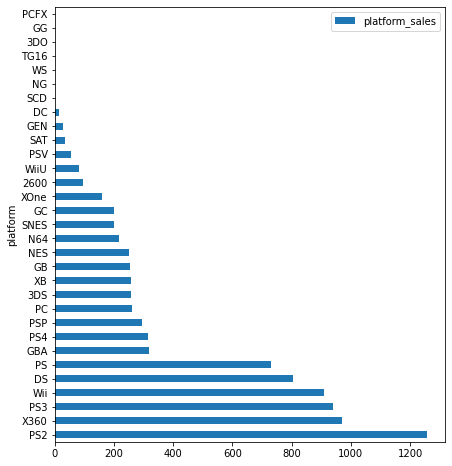

In [25]:
platform_total_sales.plot(kind='barh', figsize=(7,8))

Platform dengan total penjualan tertinggi adalah PS2 dengan jumlah senilai 1255.77

Mari buat distribusinya berdasarkan data per tahun.

In [26]:
ps2_sales = df[df['platform'] == 'PS2'].reset_index(drop=True)
ps2_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
1,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
2,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
3,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
4,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
2156,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,unidentified,0.01
2157,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,unidentified,0.01
2158,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,unidentified,0.01
2159,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,unidentified,0.01


In [27]:
# menghitung penghasilan platform ps2 per tahun
ps2_sales.groupby('year_of_release')['total_sales'].sum()

year_of_release
0        22.21
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64

Penjualan tertinggi terjadi pada tahun 2002 sejumlah 205.38, dan turun sedikit di tahun berikutnya menjadi 184.31 lalu kembali naik lagi di tahun berikutnya menjadi 211.81. Mulai dari tahun 2005 hingga tahun-tahun berikutnya, hasil penjualan semakin menurun drastis.

### Platform Yang Tidak Lagi Populer

Platform PS2 memiliki total penjualan tertinggi dari semua platform yang ada, namun jika dilihat dari distribusi penjualannya per tahun, hanya sampai pada tahun 2011 sedangkan saat ini tahun 2016. Ini berarti platform PS2 sempat populer pada masanya dan kemudian perlahan dilupakan.
Mari lihat platform dengan total penjualan tertinggi setelah PS2, yaitu X360 dengan total penjualan sejumlah 971.42

In [28]:
x360_sales = df[df['platform'] == 'X360'].reset_index(drop=True)
x360_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
3,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
4,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
1257,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01
1258,World Snooker Championship 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,NaN,0.0,unidentified,0.01
1259,Metal Gear Solid HD Edition,X360,2011,Action,0.00,0.00,0.01,0.00,NaN,0.0,M,0.01
1260,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01


In [29]:
# menghitung penghasilan platform x360 per tahun
x360_sales.groupby('year_of_release')['total_sales'].sum()

year_of_release
0        10.18
2005      8.25
2006     51.62
2007     95.41
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: total_sales, dtype: float64

Hasil penjualan pada tahun 2015 ke 2016 menurun drastis dari 11.96 menjadi 1.52

**Dari perbandingan kedua platform diatas, berikut kesimpulan yang didapat:**
- PS2 mulai aktif sejak tahun 2000, 5 tahun kemudian yaitu 2005 muncul X360 yang menjadi pesaing PS2. 
- Pada tahun 2007, penjualan PS2 mulai menurun dari 103.42(tahun 2006) menjadi 75.99
- Hal sebaliknya terjadi pada X360, penjualan tahun 2007 sejumlah 95.41 memiliki kenaikan dari tahun 2006 yang berjumlah 51.62
- Kemudian pada tahun 2008, pendapatan PS2 menurun lagi menjadi 53.90
- Sedangkan pendapatan X360 pada tahun 2008 meningkat hingga angka 135.26
- PS2 mulai kurang populer pada 6 tahun terakhirnya (dari 2006-2011)
- X360 muncul pada tahun 2005 dan dalam kurun waktu 1 tahun berhasil mengalahkan kepopuleran PS2

### Memilih Platform Penjualan Terbanyak Tahun 2016

Untuk menjadi acuan tahun 2017, kita akan menggunakan data tahun 2016. Mari lihat platform yang memiliki penjualan terbanyak pada tahun 2016.

In [30]:
all_sales = df.pivot_table(index=['year_of_release','platform'], values=['total_sales'], aggfunc='sum').sort_values(by=['year_of_release', 'total_sales'], ascending=False)
all_sales.columns = ['all_sales']
all_sales.reset_index()

,year_of_release,platform,all_sales
0,2016,PS4,69.25
1,2016,XOne,26.15
2,2016,3DS,15.14
3,2016,PC,5.25
4,2016,WiiU,4.60
...,...,...,...
249,0,GC,2.20
250,0,3DS,1.19
251,0,GB,1.03
252,0,N64,0.67


Dari hasil perhitungan diatas dapat dilihat bahwa platform dengan penjualan tertinggi adalah PS4, disusul XOne dan 3DS.

#### Platform PS4

In [31]:
ps4_sales = df[df['platform'] == 'PS4']
ps4_sales.groupby('year_of_release')['total_sales'].sum()

year_of_release
2013     25.99
2014    100.00
2015    118.90
2016     69.25
Name: total_sales, dtype: float64

Platform PS4 mulai aktif pada tahun 2013, dalam waktu 1 tahun PS4 meningkatkan penjualannya dari 25.99 menjadi 100.00
dan pada tahun 2016, dibandingkan dengan platform yang lainnya, PS4 memiliki hasil penjualan tertinggi sejumlah 69.25

#### Platform XOne

In [32]:
xone_sales = df[df['platform'] == 'XOne']
xone_sales.groupby('year_of_release')['total_sales'].sum()

year_of_release
2013    18.96
2014    54.07
2015    60.14
2016    26.15
Name: total_sales, dtype: float64

Platform XOne mulai aktif bersama PS4 yaitu tahun 2013, dari tahun awal ke tahun berikutnya penjualannya naik secara signifikan dan menurun cukup banyak pada saat 2016.

#### Platform 3DS

In [33]:
threeds_sales = df[df['platform'] == '3DS']
threeds_sales.groupby('year_of_release')['total_sales'].sum()

year_of_release
0        1.19
2011    63.20
2012    51.36
2013    56.57
2014    43.76
2015    27.78
2016    15.14
Name: total_sales, dtype: float64

Platform 3DS mulai aktif sekitar tahun 2011. Hasil penjualannya mengalami kenaikan dan penurunan sedikit demi sedikit.

Dari ketiga platform diatas, sepertinya PS4 dan XOne lebih berpeluang untuk mendatangkan keuntungan kedepannya.

### Membuat Boxplot Penjualan Game

Text(0.5, 1.0, 'total sales based on platform')

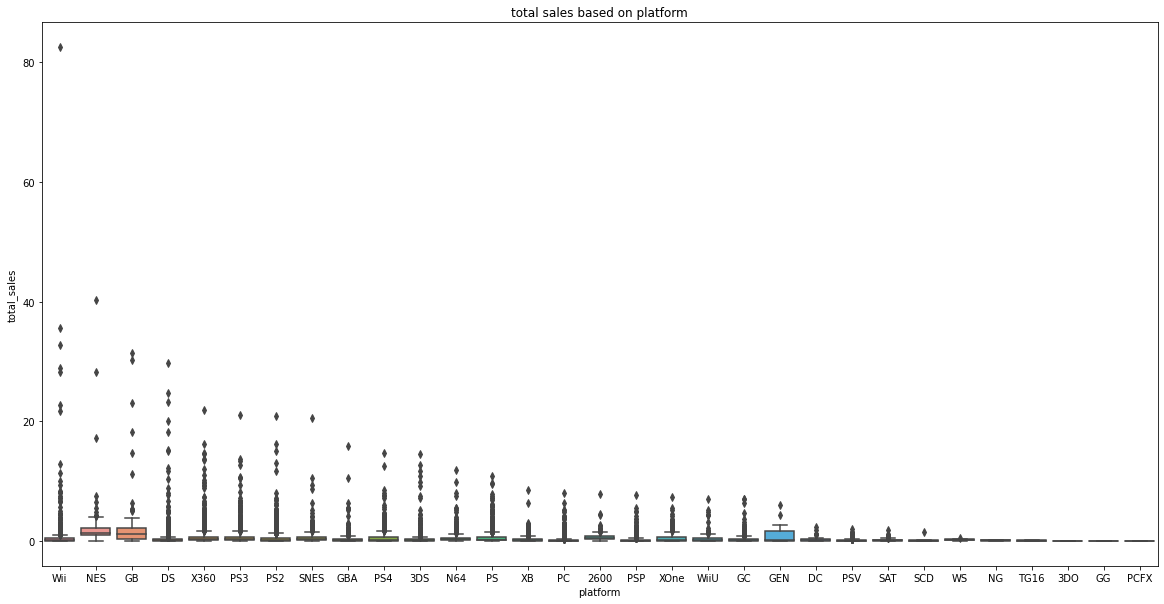

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x='platform', y='total_sales')
plt.title('total sales based on platform')

Dari boxplot diatas, terlihat banyak outlier pada beberapa platform yang populer. Pada platform NG, TG16, 3DO, GG dan PCFX karena pendapatannya sangat sedikit, maka tampilan beberapa platform tersebut tampak 1 garis saja.

### Membuat Scatterplot Berdasarkan Score

#### Scatterplot PS4

<AxesSubplot:title={'center':'correlation between critic score and total sales'}, xlabel='critic_score', ylabel='total_sales'>

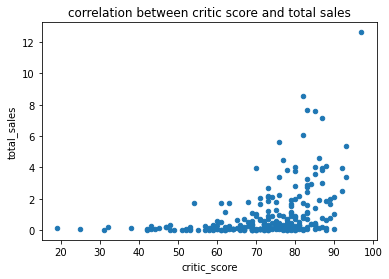

In [35]:
ps4_sales.plot(x='critic_score', y='total_sales',kind='scatter', title='correlation between critic score and total sales')

In [36]:
# menghitung nilai korelasi critic score dengan total sales
ps4_sales.corr()['critic_score']

year_of_release   -0.021142
na_sales           0.415008
eu_sales           0.346720
jp_sales           0.322358
other_sales        0.409191
critic_score       1.000000
user_score         0.510624
total_sales        0.406568
Name: critic_score, dtype: float64

Hasil nilai korelasi adalah 1, yang berarti critic score berpengaruh pada penjualan game.

<AxesSubplot:title={'center':'correlation between user score and total sales'}, xlabel='user_score', ylabel='total_sales'>

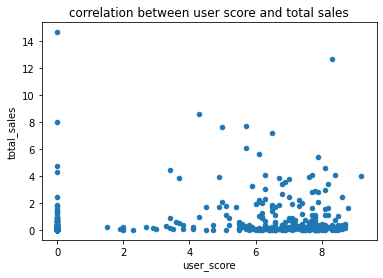

In [37]:
ps4_sales.plot(x='user_score', y='total_sales',kind='scatter',
               title='correlation between user score and total sales')

In [38]:
# menghitung nilai korelasi user score dengan total sales
ps4_sales.corr()['user_score']

year_of_release   -0.062157
na_sales           0.109930
eu_sales           0.111441
jp_sales          -0.027284
other_sales        0.115411
critic_score       0.510624
user_score         1.000000
total_sales        0.113116
Name: user_score, dtype: float64

Nilai korelasi antara user score dan total score adalah 1, yang berarti penilaian pengguna juga sama berpengaruh dengan critic score dalam penjualan game.

#### Scatterplot XOne

<AxesSubplot:title={'center':'correlation between critic score and total sales'}, xlabel='critic_score', ylabel='total_sales'>

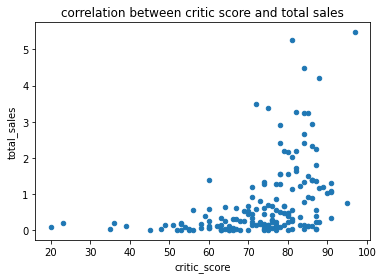

In [39]:
xone_sales.plot(x='critic_score', y='total_sales',kind='scatter',
                title='correlation between critic score and total sales')

In [40]:
# menghitung nilai korelasi critic score dengan total sales
xone_sales.corr()['critic_score']

year_of_release    0.063712
na_sales           0.388636
eu_sales           0.379162
jp_sales           0.202954
other_sales        0.411825
critic_score       1.000000
user_score         0.458495
total_sales        0.416998
Name: critic_score, dtype: float64

Nilai korelasi antara critic score dengan total sales adalah 1, ini menandakan ada pengaruh antara critic score dengan penjualan game.

In [41]:
# menghitung nilai korelasi user score dengan total sales
xone_sales.corr()['user_score']

year_of_release   -0.001284
na_sales           0.112752
eu_sales           0.105354
jp_sales           0.090304
other_sales        0.113772
critic_score       0.458495
user_score         1.000000
total_sales        0.116563
Name: user_score, dtype: float64

Sama seperti critic score, user score juga berpengaruh dalam penjualan game.

### Distribusi Game Berdasarkan Genre

In [42]:
# melihat distribusi game berdasarkan genre
df.groupby('genre')['total_sales'].count().sort_values(ascending=False)

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: total_sales, dtype: int64

**Kesimpulan:**
Dari hasil distribusi di atas, dapat dilihat bahwa genre game yang paling populer atau banyak dibeli adalah genre action, setelahnya ada genre sports yang lumayan populer juga. Kedua genre game ini adalah yang paling umum dan banyak digemari oleh pemain. Genre action umumnya memiliki banyak tantangan, semakin tinggi levelnya maka akan semakin sulit tantangannya. Genre action juga membutuhkan kecepatan dan skill bermain yang mumpuni seperti memecahkan masalah serta memikirkan strategi berikutnya. 

Kemudian ada genre puzzle yang menempati posisi terakhir. Genre game puzzle biasanya lebih banyak dimainkan oleh orang yang ingin menghilangkan rasa bosan atau menghabiskan waktu. Genre puzzle dianggap tidak menarik untuk dimainkan oleh sebagian besar orang karena dapat membosankan atau kurang memberikan tantangan.

## Tahap 3.  Profil Pengguna Daerah (NA, EU, JP)

### Platform Terpopuler Wilayah NA, EU, JP

#### Platform Wilayah NA

In [43]:
# melihat 5 platform teratas na
na_platform = df.pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum').sort_values(by=['na_sales'], ascending=False)
na_platform.head()

,na_sales
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40


Platform teratas urutan pertama di wilayah NA adalah X360 dengan pendapatan senilai 602.47, sedangkan platform urutan kelima adalah DS dengan pendapatan senilai 382.40

#### Platform Wilayah EU

In [44]:
# melihat 5 platform teratas eu
eu_platform = df.pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum').sort_values(by=['eu_sales'], ascending=False)
eu_platform.head()

,eu_sales
platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61


Platform teratas urutan pertama di wilayah EU adalah PS2 dengan pendapatan senilai 339.29, sedangkan platform urutan kelima adalah PS dengan pendapatan senilai 213.61

#### Platform Wilayah JP

In [45]:
# melihat 5 platform teratas jp
jp_platform = df.pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum').sort_values(by=['jp_sales'], ascending=False)
jp_platform.head()

,jp_sales
platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67


Platform teratas urutan pertama di wilayah JP adalah DS dengan pendapatan senilai 175.57, sedangkan platform urutan kelima adalah 3DS dengan pendapatan 100.67

**Kesimpulan:
Dari hasil platform terpopuler di ketiga wilayah, pasar yang mendatangkan lebih banyak keuntungan adalah platform yang berada di pasar wilayah NA.**
- Platform NA urutan pertama yaitu X360, berhasil menjual game dengan total penjualan sebesar 602.47
- Platform EU urutan pertama yaitu PS2, berhasil menjual game dengan total pendapatan sebesar 339.29, angka ini hanya separuh lebih saja jika dibandingkan dengan pendapatan platform teratas NA.
- Platform EU urutan pertama yaitu DS, hanya berhasil menjual game dengan total pendapatan sebesar 175.57, angka yang sangat jauh jika dibandingkan platform DS yang berada di wilayah NA (pendapatan DS di wilayah NA = 382.40).


### Genre Terpopuler Wilayah NA, EU, JP

#### Genre Wilayah NA

In [46]:
# melihat 5 genre terpopuler na
na_genre = df.pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum').sort_values(by=['na_sales'], ascending=False)
na_genre.head()

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27


Genre terpopuler di wilayah NA adalah action di peringkat pertama, dan di peringkat terakhir adalah misc.

#### Genre Wilayah EU

In [47]:
# melihat 5 genre teratas eu
eu_genre = df.pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum').sort_values(by=['eu_sales'], ascending=False)
eu_genre.head()

,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74


Genre terpopuler di wilayah EU adalah action, di urutan kelima adalah misc.

#### Genre Wilayah JP

In [48]:
# melihat 5 genre teratas jp
jp_genre = df.pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum').sort_values(by=['jp_sales'], ascending=False)
jp_genre.head()

,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11


Genre terpopuler di wilayah JP adalah role-playing dan sama seperti wilayah NA dan EU, di urutan kelima ada genre misc.

**Kesimpulan: Pada wilayah NA dan EU, genre terpopuler adalah action. Sedangkan di wilayah JP, role-playing adalah genre terpopuler.**
- Di wilayah NA dan EU, urutan pertama hingga ketiga dan kelima memiliki genre yang sama, yaitu ***action,sports,shooter,misc.***
- Berbeda dengan wilayah NA dan EU, genre terpopuler di wilayah JP adalah role-playing. Genre action berada di urutan kedua disusul dengan sports di urutan ketiga.

### Pengaruh Rating Terhadap Penjualan Game

Keterangan rating ESRB :
- E : Everyone (semua orang)
- T : Teen (remaja)
- M : Mature (untuk umur 17+)
- E10+ : Everyone (semua orang, minimal umur 10+)
- K-A : Kids to Adults (anak-anak hingga dewasa)
- AO : Adults Only (khusus dewasa umur 18+)
- EC : Early Childhood (untuk umur 3+)
- RP : Rating Pending (belum diputuskan)
- unidentified : tidak teridentifikasi

In [49]:
rate_sales = df.pivot_table(index='rating', values=['total_sales'], aggfunc='sum').sort_values(by='total_sales', ascending=False)
rate_sales

,total_sales
rating,
unidentified,2846.91
E,2435.52
T,1493.35
M,1473.79
E10+,655.60
K-A,4.32
AO,1.96
EC,1.75
RP,0.09


**Kesimpulan : Rating memiliki pengaruh dalam penjualan sebuah game.**

Berdasarkan urutan diatas, game dengan rating E memiliki penjualan terbanyak senilai 2846.91 di seluruh wilayah. Ini karena game dengan rating E dapat dimainkan oleh siapa saja dan mengandung sangat sedikit unsur kekerasan. Menyusul di urutan kedua ada game dengan rating T dengan total penjualan di seluruh wilayah senilai 2435.52

## Tahap 4. Menghitung Varians dan Standar Deviasi

### Nilai Varian Wilayah NA,EU dan JP

In [50]:
# menghitung nilai varian wilayah na
np.var(df['na_sales'])

0.6618485161543495

In [51]:
# menghitung nilai varian wilayah eu
np.var(df['eu_sales'])

0.25335469340593053

In [52]:
# menghitung nilai varian wilayah jp
np.var(df['jp_sales'])

0.09539564989906053

### Standar Deviasi Wilayah NA, EU dan JP

In [53]:
# menghitung standar deviasi wilayah na
np.std(df['na_sales'])

0.8135407280243254

In [54]:
# menghitung standar deviasi wilayah eu
np.std(df['eu_sales'])

0.5033435143179363

In [55]:
# menghitung standar deviasi wilayah jp
np.std(df['jp_sales'])

0.3088618621634282

## Tahap 5. Menguji Hipotesis

### Menguji Hipotesis Platform Xbox One dan PC
- H0 (Null Hypothesis) : Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
- H1 (Alternative Hypothesis) : Rata-rata rating pengguna platform Xbox One dan PC adalah berbeda.

In [56]:
alpha = 0.05

results = st.ttest_ind(df[df['platform'] == 'XOne']['user_score'], df[df['platform'] == 'PC']['user_score'], equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.0005833414469972175
We reject the null hypothesis


Hasil uji hipotesis diatas yaitu rata-rata rating pengguna platform Xbox One dan PC adalah berbeda.

### Menguji Hipotesis Genre Action dan Sports
- H0 (Null Hypothesis) : Rata-rata rating pengguna genre Action dan Sports berbeda.
- H1 (Alternative Hypothesis) : Rata-rata rating pengguna genre Action dan Sports sama.

In [57]:
alpha = 0.05

results = st.ttest_ind(df[df['genre'] == 'Action']['user_score'], df[df['genre'] == 'Sports']['user_score'], equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  1.1944013786844029e-08
We reject the null hypothesis


Hasil uji hipotesis diatas yaitu rata-rata rating pengguna genre Action dan Sports sama.

# Kesimpulan

Setelah melalui proses pembersihan dan analisis data, berikut hal-hal yang dapat disimpulkan:
1. Genre game yang paling populer dan banyak memberikan pemasukan adalah genre action dan sports.
2. Wilayah NA mendapatkan penghasilan dari game genre action sebesar 879.01, wilayah EU sebesar 519.13 dan wilayah JP sebesar 161.43
3. Sedangkan untuk genre sports, wilayah NA menghasilkan 684.43, wilayah EU sebesar 376.79 dan wilayah JP sebesar 135.54
4. Dengan mengetahui genre action dan sports adalah genre yang paling diminati, maka kita dapat fokus membuat kampanye iklan untuk kedua genre tersebut.
5. Kemudian setelah menguji hipotesis, kita mengetahui bahwa rata-rata rating pengguna platform Xbox One dan PC berbeda.
6. Lalu hasil hipotesis kedua menyatakan bahwa rata-rata rating pengguna genre Action dan Sports sama.